In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import plotly.figure_factory as FF


In [9]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))

    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [13]:
#   Data_set
data = pd.read_csv('day.csv')
sample_data_table = FF.create_table(data.head())

x_data = data['dteday']
y_data = data['cnt']
x = arange(0,731)[:, np.newaxis]
y = y_data.astype('float32', raise_on_error = False)[:, np.newaxis]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

the raise_on_error=False keyword is deprecated, use errors='ignore' instead



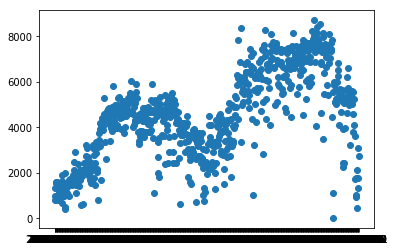

In [14]:
# plot data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
#plt.ion() #unblock ploting process
plt.show()

In [15]:
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])


# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

# error between prediction and real data
loss_sum = tf.square( ys - prediction)
loss = tf.reduce_mean(loss_sum)
train_step = tf.train.AdamOptimizer(0.5).minimize(loss)

In [16]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

loss_pre = 100
count = 0
count_1 = []
histx = []
loss_y = []

Instructions for updating:
Use `tf.global_variables_initializer` instead.


0 5328078.5


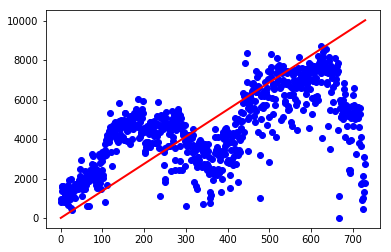

100 3299310.2


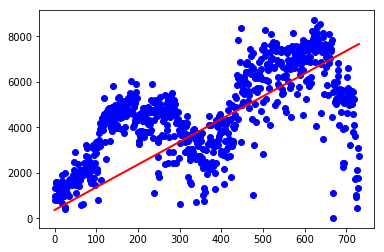

200 2889814.8


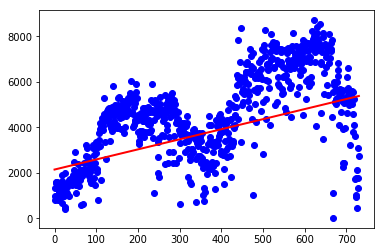

284 2265855.2


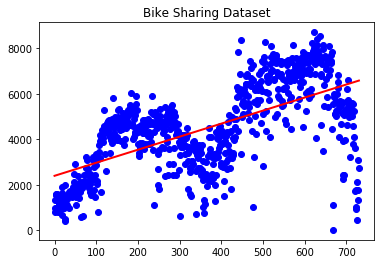

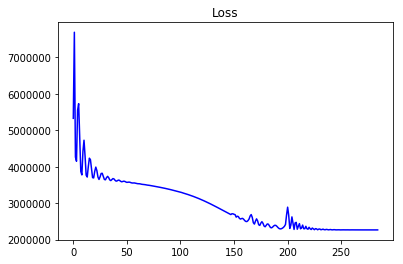

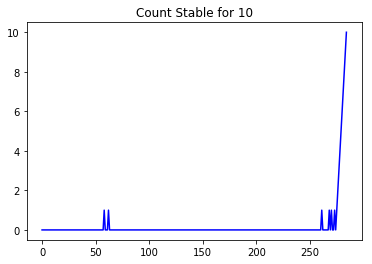

In [17]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x, ys: y})
    current_loss = sess.run(loss, feed_dict={xs: x, ys: y})
    prediction_value = sess.run(prediction, feed_dict={xs:x})
    histx.append(i)
    loss_y.append(current_loss)
    count_1.append(count)
    if abs(loss_pre - current_loss) < 0.0001*loss_pre:
        count+=1
        if count > 10:
            print(i, current_loss)
            plt.title('Bike Sharing Dataset')
            plt.plot(x, y, 'bo')
            plt.plot(x, prediction_value,'r', linewidth=2.0)
            plt.show()
            
            plt.title('Loss')
            plt.plot(histx, loss_y, 'b')
            plt.show()
            
            plt.title('Count Stable for 10')
            plt.plot(histx, count_1, 'b')
            plt.show()
            break
    else: count = 0
    
    loss_pre = current_loss
    if i % 100 == 0:
        # to see the step improvement
        print(i, current_loss)
        plt.plot(x, y, 'bo')
        plt.plot(x, prediction_value,'r', linewidth=2.0)
        plt.show()